
## Metoda najmniejszych kwadratów
## Aproksymacja wielomianowa
<p>Cel:</p>
<ol>
<li>Zastosowanie algebry liniowej do prostego przypadku interpolacji funkcji wielomianami $x^n$.</li>
<li>Sage: Wykorzystanie technik operacji na macierzach i danych.</li>
</ol>
<p> </p>
<p>Mamy dane punkty $(x_1,y_1),\dots,(x_n,y_n)$. Szukamy wielomianu stopnia $n-1$ przechodzącego przez te punkty.</p>
<ul>
<li>$c_i$ to współczynniki wielomianu</li>
</ul>
<p> </p>

In [82]:
var('x')
xs=[]
ys=[]
cs=[]
n_pkts = 4
for i in range(1,n_pkts+1):
    xs.append(var('x%d' % i))
    ys.append(var('y%d' % i))
    cs.append(var('c%d' % i))
X=vector([x^i for i in range(n_pkts)]    )
A=(matrix([ X.subs(x==xx) for xx in xs] ))
b=(vector(ys).column())
c=(vector(cs).column())
# table([["$A$","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b]],header_row=True)

In [94]:
show(A)


[1 1 1]
[1 2 4]
[1 3 9]

<p>Bierzemy konkretne punkty:</p>

In [95]:
points=[[1,1],[2,2],[3,5]]
points

[[1, 1], [2, 2], [3, 5]]

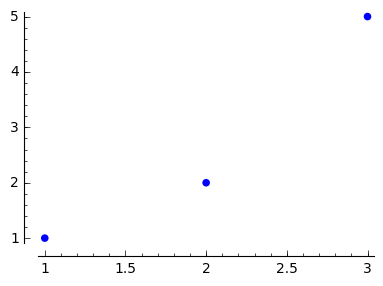

In [96]:
table(  [["x","y"]]+points, header_row=True)
pkt_plt=point(points,size=30)
show(pkt_plt,figsize=4)

In [97]:
points

[[1, 1], [2, 2], [3, 5]]

In [99]:
npoints=len(points)
print npoints

3


In [100]:
[[x_^i for i in range(npoints)] for x_,y_ in points]

[[1, 1, 1], [1, 2, 4], [1, 3, 9]]

In [101]:
A = matrix( [[x_^i for i in range(npoints)] for x_,y_ in points])
show(A)

[1 1 1]
[1 2 4]
[1 3 9]

In [102]:
b = vector( [y_ for x_,y_ in points] )
b

(1, 2, 5)

Rozwiązujemy ze względu na współczynniki $c_i$:

In [105]:
c = A.solve_right(b)
c

(2, -2, 1)

sprawdźmy:

In [110]:
A*c==b

True

In [111]:
table([["$A$","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b]],header_row=True)

,,,
,,,


In [112]:
## Możemy utworzyć  wielomian mnożąc skalarnie wektor z elementami bazy funckji ze współczynnikami

In [113]:
var('x')
X = vector([x^i for i in range(npoints)])

x^2 - 2*x + 2

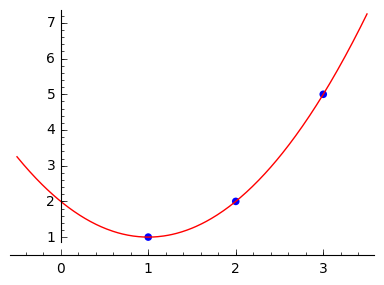

In [114]:
wielomian= c.dot_product(X)
show(wielomian)
plot(wielomian,(-.5,3.5),color='red',figsize=4)+pkt_plt

### Weźmy inny zestaw danych

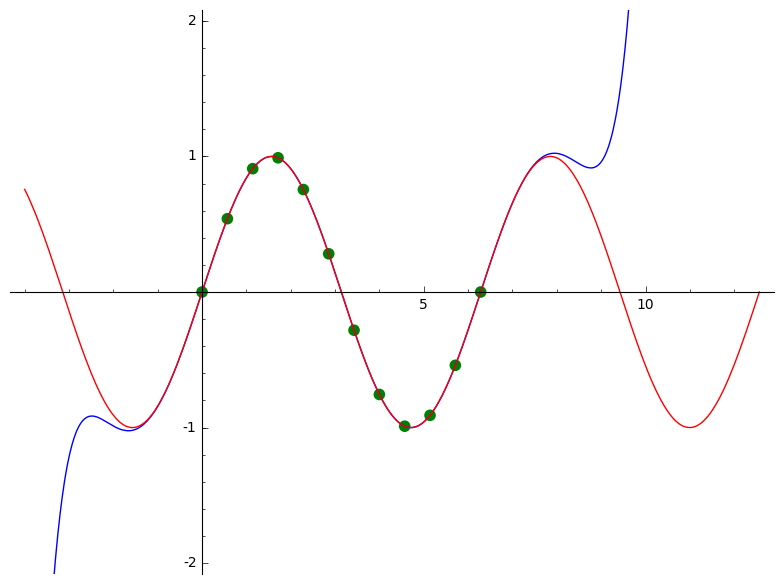

In [75]:

n=12
l=[ ( 2*pi.n()/(n-1)*i   ,   sin(2*pi.n()/(n-1)*i)  ) for i in range(n)]


A = matrix( [[x_^i for i in range(n)] for x_,y_ in l])
b = vector( [y_ for x_,y_ in l] )
var('x')
X = vector([x^i for i in range(n)])
c = A.solve_right(b)
wielomian= c.dot_product(X)
pp = plot(wielomian,(x,-4,12),ymin=-2,ymax=2)
pp += plot(sin(x),(x,-4,4*pi),color='red')
pp += point(l,color='green',size=70)
pp.show()

W SageMath mamy instniejącą implementacje zagadnienia Lagrange'a.

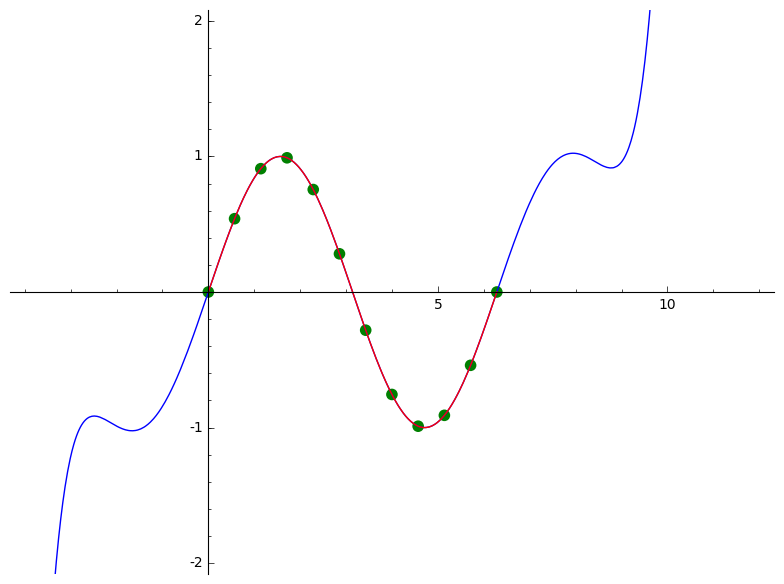

In [115]:
var('x')
n=12
l=[ ( 2*pi.n()/(n-1)*i   ,   sin(2*pi.n()/(n-1)*i)  ) for i in range(n)]
R = PolynomialRing(RR, 'x')
L = R.lagrange_polynomial(l)
pp=L.plot(-4,12,ymin=-2,ymax=2)+plot(sin(x),(x,0,2*pi),color='red')+point(l,color='green',size=70)
pp.show()

Należy uważać na fakt, że `x` jest generatorem pierścienia  wielomianów nie zmienną symboliczą:

In [118]:
var('y')
R.<x> = PolynomialRing(RR)
L = R.lagrange_polynomial(l)
print type(L(y))
print type(L)
print type(L(x))
print type(x)

<type 'sage.symbolic.expression.Expression'>
<type 'sage.rings.polynomial.polynomial_real_mpfr_dense.PolynomialRealDense'>
<type 'sage.rings.polynomial.polynomial_real_mpfr_dense.PolynomialRealDense'>
<type 'sage.rings.polynomial.polynomial_real_mpfr_dense.PolynomialRealDense'>


In [121]:
var('x')
f(x)=exp(-x)*sin(x)
f(1.1)

0.296657159743355

### interact 

[link](http://sagecell.sagemath.org/?z=eJxtkMFOhDAQhu8kvENvzLADAqImJk18gD0YrsaYZinYpLSkoBaf3gLu7kF7mE6m35_5_34KB4n3CcZRB94jn5RZ7zh6UmaWTpzmOGplx8J8tHoBwyetWunACdNLqKgqkAIgPvTMayRxfp92oMgruqNQr1SJDNljHLFw9qr5CwORVumocgN4AyYrMVUk_QhZ0KZ_3zBdnf4zR9ZZxxRThu0ODL7uWxrG2XPIYOyghG6U6aFpiCVb-hU4BqDJteg34dt4YUH_EmOwf8xHbWfIatq3H2paBmV4VoaoyyA8Dw0eNugSwO9-PRJ4KmjVpQLpZLV1PHGyTYLChi8HfR72TkqTUKf6SX1LDvd0i7S1D8XVTj692y_AH8zJgz0=&lang=sage)

    var('xx')
    f(xx)=sin(xx)
    @interact
    def sinpoly(n=slider(range(2,20),default=4),a=slider(srange(0.2,5,0.2),default=1) ) :

        l=[ (a*2*pi.n()/(n-1)*i,exp(-0.2*a*2*pi.n()/(n-1)*i)*sin(a*2*pi.n()/(n-1)*i)) for i in range(n)]
        R = PolynomialRing(RR, 'x')
        L = R.lagrange_polynomial(l)
        plt=L.plot(-4,a*2*pi+4,ymin=-1.2,ymax=1.2)+plot(exp(-0.2*x)*sin(x),(x,0,2*pi*a),color='red')+point(l,color='green',figsize=(6,3),size=70)
        plt.show()

### Inne bazy

Bazą nie muszą być wielomiany.
Konieczne jest jednak by był to zestaw funkcji liniowo niezależnych.

In [181]:
points = [[1,1],[2,2],[3,5]]

In [182]:
x_lst = [x_ for x_,y_ in points]
y_lst = [y_ for x_,y_ in points]

In [183]:
X = vector([x^i for i in range(npoints)])


Spróbuj na przykład:

```python
    X = vector([sin(x*i) for i in range(npoints)])
    X[0] = 1
```

albo:

```python
    X = vector([exp(x*i) for i in range(npoints)])
```

In [184]:
X

(1, x, x^2)

Zapiszmy tworzenie macierzy $A$ w sposób niezależny od tego jaką formuła będzie w wektorze `X`:

In [185]:
A = matrix( [X.subs({x:x_}) for x_ in x_lst] ) 
b = vector(y_lst)

In [186]:
A

[1 1 1]
[1 2 4]
[1 3 9]

In [187]:
c = A.solve_right(b)

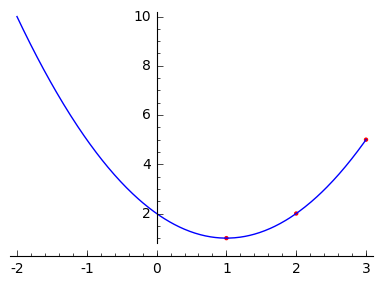

In [188]:
plot(X.dot_product(c),(x,-2,3)) + point(points,figsize=4,color='red')


<h2>Metoda najmniejszych kwadratów</h2>
<p>Cel:</p>
<ol>
<li>Zrozumienie podstaw metody najmniejszych kwadratów</li>
<li>Sage: umiejętność operacji na macierzach i danych.</li>
</ol>
<p> </p>
<p>Zamiast:</p>
<p>$$  A x =  b$$</p>
<p>rozwiązujemy</p>
<p>$$ A^T A x = A^T b.$$</p>
<p>Inaczej mówiąc, niech błąd:</p>
<p>$$  r=b-A x$$</p>
<p>leży w lewym jądrze A:</p>
<p>$$A^T r =A^T( b-Ax) = A^T b-A^TAx = 0.$$</p>
<p> </p>
<p>$$ A^T A x = A^T b.$$</p>
<ol> </ol>

In [189]:
var('x y t')
points=[[0,1],[2,0],[3,4],[5,6]]

In [190]:
N=len(points)

X=vector([1,x])
M=len(X)

var('x')
xs=[]
ys=[]
cs=[]
for i in range(1,N+1):
    xs.append(var('x%d' % i))
    ys.append(var('y%d' % i))
for i in range(1,M+1):    
    cs.append(var('c%d' % i))
    

A=(matrix([ X.subs(x==xx) for xx in xs] ))
b=(vector(ys).column())
c=(vector(cs).column())


ATA=A.transpose()*A
ATb=A.transpose()*b

table([["$A$","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b],[ATA,"$\cdot$",c,ATb]],header_row=True)

,,,
,,,
,,,


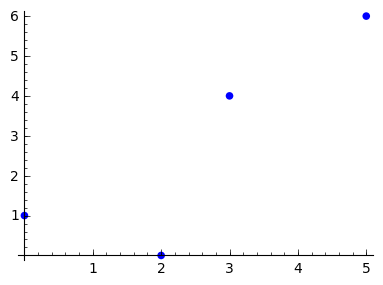

In [191]:
points=[[0,1],[2,0],[3,4],[5,6]]
table(  [["x","y"]]+points, header_row=True)
pkt_plt=point(points,size=30)
show(pkt_plt,figsize=4)

In [192]:
Alst=[]
blst=[]

for k in range(N):
    mk=[]
    for j in range(M):
        mk+=[points[k][0]^j]
    Alst+=[mk]
    blst+=[points[k][1]]

In [193]:
A=matrix(RDF,Alst)
b=vector(blst)

ATA=A.transpose()*A
ATb=A.transpose()*b

In [194]:
table([["$A$","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b],[ATA,"$\cdot$",c,ATb]],header_row=True)

,,,
,,,
,,,


In [195]:
c=ATA\ATb

In [196]:
c

(-0.03846153846153797, 1.1153846153846152)

In [197]:
wielomian= c.dot_product( X )
show(wielomian)

1.1153846153846152*x - 0.03846153846153797

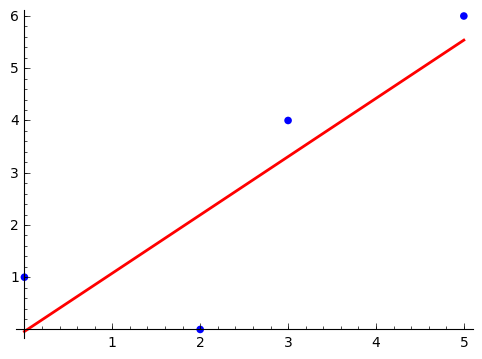

In [198]:
pkt_plt+plot(wielomian, (x,0,5),color='red',thickness=2,figsize=5)

<h2>Praktyczne stosowanie interpolacji i aproksymacji w Sage</h2>
<h3></h3>
<p> </p>
<p>Zagadnienie Lagrange'a w Sage:</p>

In [199]:
pts=[[1,1],[2,2],[3,4]]
R = PolynomialRing(QQ, 'x')    ### x - bedzie generatorem wielomianów nad ciałem liczb wymiernych, 
                               ### R - będzie objektem reprezentującym to ciało
L = R.lagrange_polynomial(pts) ### interpolacja Lagrange'a jest zaimplementowana w R 
show(L(x).expand() )

1/2*x^2 - 1/2*x + 1

<h2>Przykład: zjawisko Rungego</h2>

<p>Rozważmy funkcję:</p>

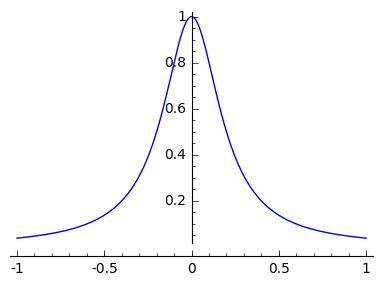

In [200]:
f(x)= 1/(1+25*x^2)
plot(f,(-1,1), figsize=4)

<p>Jej pochodne przyjmują duże wartości w $0$:</p>

In [201]:
[ diff(1/(1+25*x^2),x,i).subs({x:0}) for i in range(1,7) ]

[0, -50, 0, 15000, 0, -11250000]

### Zjawisko Rungego - interact

[link](http://sagecell.sagemath.org/?z=eJx9ksFu4jAQhu9IvMOIHjIGQ3F2q5UqWVqp1x4K14gilzjBJdiWHVrY4z5Xr32vOnFY0lVVHyKP_X8z_3jyW-laOrGph4PhIJcFtDFDvba7mvtK5dKhE7qUyGg6JzRoxKGq-S8C5HY4gLCOcwAOLAYFHkkIrpFN0pvx8TElnWj9ZA469xynjLLu0EJD2srUWNCzgkK9VZudlt7zMx2_V9EVm3cpX0TlGc82xqO6jpanjIytmmkkBArjQIWGIPpv78mqx6Y8m7IJYDru4aSBv2WvWvgHzyAdh-vc7JFM2dcIdIwNT5Z1-0bYpmjEWXRCYzOr236_LVh7nqGiiwUWqEi_rRZZXaTL8JYPpjpps1eiWipd4mJBITkm5CK6D6LlrBJl63Jt_-kxVOrr1s1YztO5D1PtDWhjKuN4UjopdfJpXrRQpVd_JP_ZyxWanwlrpc4xpp3YiTXhT2tq0nYXmTntMjuZJ-TT7K0LKhjBZT0c9K4-wbPMtXEm10qCNe9_zfub0XJE-9L_V4febeXTyW_lixjFInth0W_NKw2Ou-of58_iBQ==&lang=sage)

```python
    @interact

    def inter1(n_pkt=slider(range(1,20),default=7) ):
        x0  = 1
        f(x)= 1/(1+25*x^2)
        x_bounds=(-1,1)
        p   = plot(f,x_bounds, thickness=2)

        #n_pkt=10
        xvals1=[cos(i/(n_pkt-1)*pi.n()) for i in range(n_pkt)]
        xvals2=[-1+ (2*i/(n_pkt-1)).n() for i in range(n_pkt)]
        #xvals3=[ 2*random()-1 for i in range(n_pkt) ]
        plt=[]
        for xvals in [xvals2,xvals1]:

            pts=[(i,QQ(f(i))) for i in xvals]
            R = PolynomialRing(QQ, 'x')
            L = R.lagrange_polynomial(pts)
            L_plot = plot(L(x),x_bounds, color='green', thickness=2,figsize=4)
            plt.append(L_plot+p+point(pts,pointsize=40,color='red'))

        print "           Punkty jednorodnie położone","                           Punkty Chebysheva"
        map(show,plt)
```

In [202]:
pts=[(1,1),(2,2),(3,4)]

In [203]:
R = PolynomialRing(QQ, 'x')
L = R.lagrange_polynomial(pts)
show(L)

1/2*x^2 - 1/2*x + 1

In [204]:
DD=R.divided_difference(pts)
DD

[1, 1, 1/2]

In [205]:
xlst=map(lambda y:y[0],pts)
xlst

[1, 2, 3]

In [206]:
f=[1]
for xi in xlst[:-1]:
    f.append( f[-1]*(x-xi) )
table(f)

,,


In [207]:
table(zip(DD,f))

,
,
,


In [208]:
sum([dd*f_ for dd,f_ in zip(DD,f)]).expand().show()

1/2*x^2 - 1/2*x + 1

In [209]:
DD=vector(DD)
f=vector(f)
f.dot_product(DD).expand().show()

1/2*x^2 - 1/2*x + 1

In [210]:
xlst[:-1]

[1, 2]

<h2>Praktyczne stosowanie  regresji liniowej</h2>
<h3>find_fit - używa pakietu scipy.optimize</h3>
<p> </p>

In [211]:
var('a,b,c')
model(x) = a*x+b
fit = find_fit(points,model,solution_dict=True)
fit

{b: -0.0384615384638034, a: 1.115384615384867}

In [212]:
model.subs(fit)

x |--> 1.115384615384867*x - 0.0384615384638034

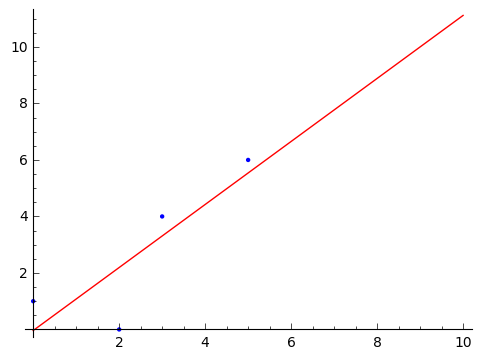

In [213]:
point(points)+plot(model.subs(fit),(x,0,10),color='red',figsize=5)

<h3>Splajny (GSL)</h3>

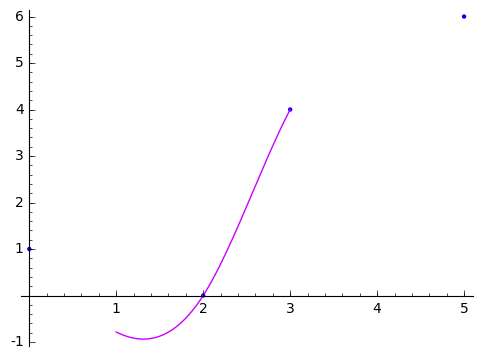

[[0, 1], [2, 0], [3, 4], [5, 6]]

In [214]:
s = spline(points)
show(point(points) + plot(s,1,3, hue=.8,figsize=5))
s.list()

In [215]:
points

[[0, 1], [2, 0], [3, 4], [5, 6]]

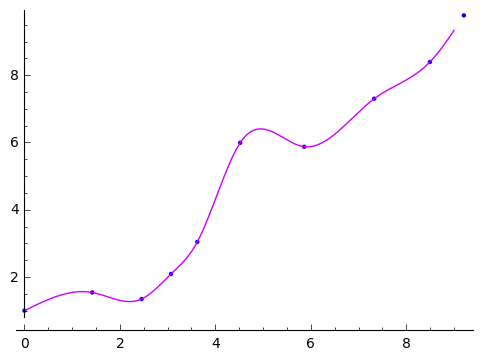

[(0, 1),
 (1/2*sin(1) + 1, cos(1) + 1),
 (1/2*sin(2) + 2, cos(4) + 2),
 (1/2*sin(3) + 3, cos(9) + 3),
 (1/2*sin(4) + 4, cos(16) + 4),
 (1/2*sin(5) + 5, cos(25) + 5),
 (1/2*sin(6) + 6, cos(36) + 6),
 (1/2*sin(7) + 7, cos(49) + 7),
 (1/2*sin(8) + 8, cos(64) + 8),
 (1/2*sin(9) + 9, cos(81) + 9)]

In [216]:
v = [(i + sin(i)/2, i+cos(i^2)) for i in range(10)]
s = spline(v)
show(point(v) + plot(s,0,9, hue=.8,figsize=5))
s.list()

<h3>Bezier</h3>

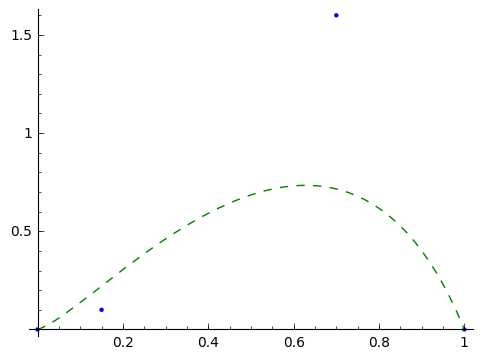

In [217]:
pts=[(0,0),(.15,.1),(0.7,1.6),(1,0)]
path = [pts]
curve = bezier_path(path, linestyle='dashed', rgbcolor='green',figsize=5)
curve+point(pts)